# <div style="text-align: center;">**Heart Disease Classification**</div>

# *Overview*

### **Scope**
The primary goal of this project is to find the best classifier that effectively distinguishes individuals who have a heart disease from those who do not, and use the results to predict the condition of future patients. For that purpose several classifiers will be tried out, as well as ensemble methods, boosting and stacking methods. Results from all these methods will be analysed and a discussion will follow regarding the adventages and disadvanteges of each of the methods used. Finally, the best classifier will be selected depending on the findings of the analysis and the discussion. 


### **Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### **Attribute Information**
1. Age: age of the patient [years]
1. Sex: sex of the patient [M: Male, F: Female]
1. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
1. RestingBP: resting blood pressure [mm Hg]
1. Cholesterol: serum cholesterol [mm/dl]
1. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
1. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
1. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
1. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
1. Oldpeak: oldpeak = ST [Numeric value measured in depression]
1. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
1. HeartDisease: output class [1: heart disease, 0: Normal]

### **Source**
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

*Final dataset: 918 observations*

### Libraries used

In [154]:
import pandas as pd

import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, GroupShuffleSplit

# Import sklearn objects
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Tree helper libraries
from sklearn import tree
from io import StringIO
import pydotplus
import matplotlib.image as mpimg

# Import ensemble objects
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Import plotting libraries
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, confusion_matrix, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ignore any Deprication, Future or User Warnings:

In [155]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# *Exploratory Data Analysis*

In [156]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [157]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [158]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

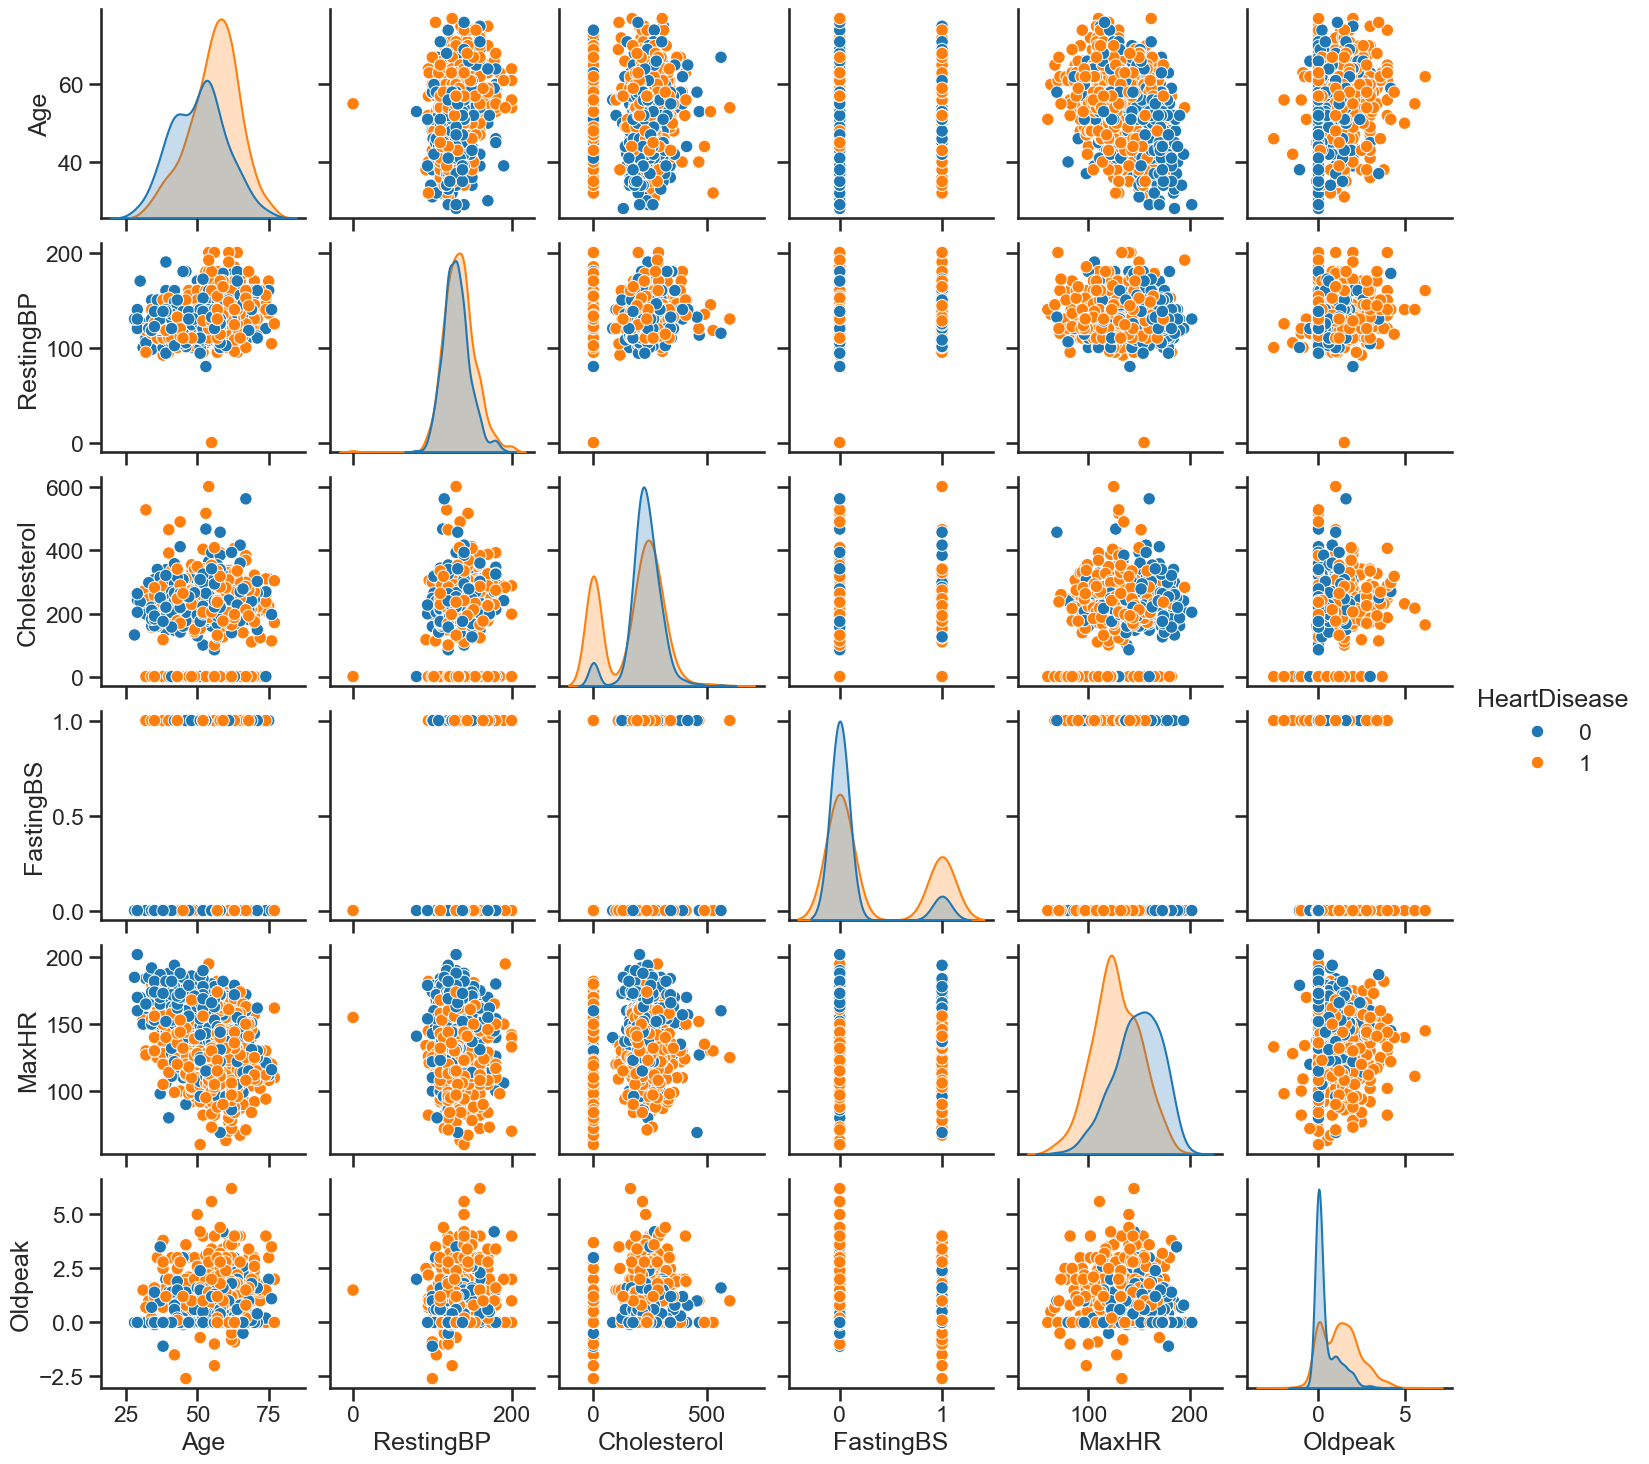

In [159]:
sns.pairplot(data, hue="HeartDisease")

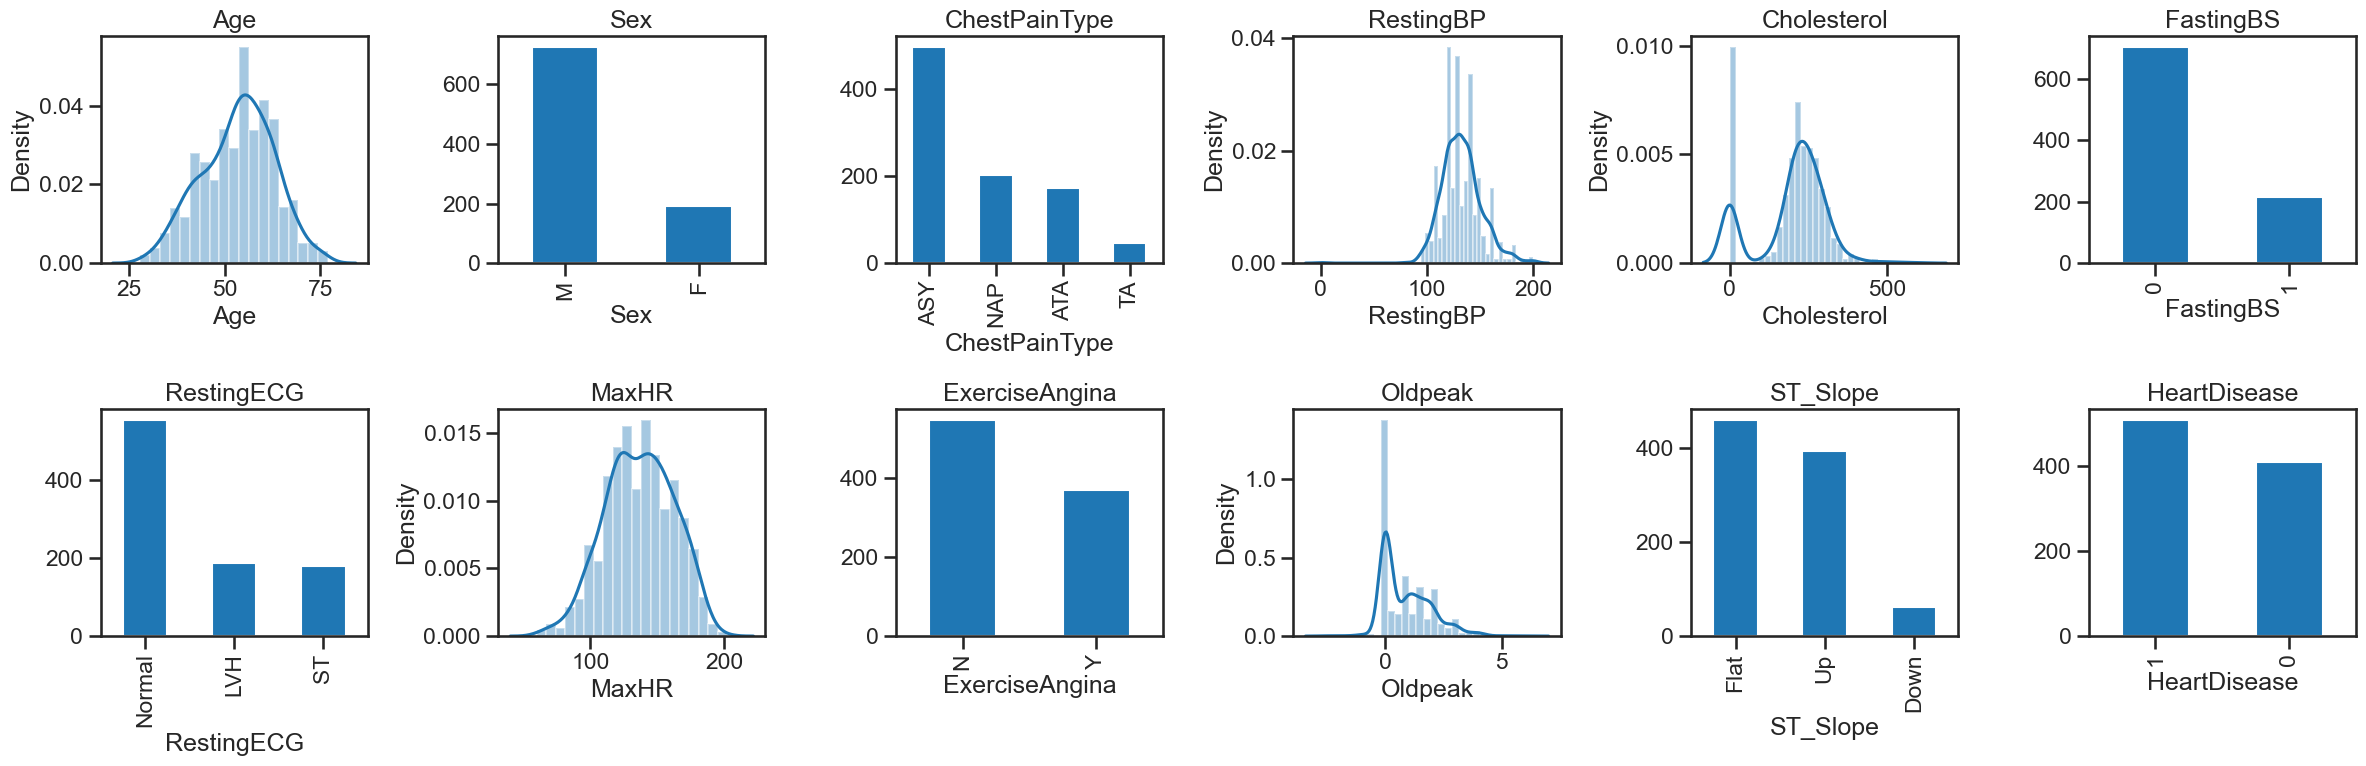

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(24,8))
axes = axes.flatten()

columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for i, column in enumerate(data.columns):
    if column in columns:
        data[column].value_counts().plot.bar(ax=axes[i])
        axes[i].set_title(column)
    else:
        sns.distplot(data[column], ax=axes[i])
        #data[column].plot.hist(ax=axes[i])
        axes[i].set_title(column) 
plt.tight_layout()
plt.show()

In [161]:
data.Cholesterol.value_counts().sort_index().to_frame().head(20).T

Cholesterol,0,85,100,110,113,117,123,126,129,131,132,139,141,142,147,149,152,153,156,157
count,172,1,2,1,1,1,1,2,1,1,1,2,1,1,2,2,1,1,1,1


In [162]:
data.Oldpeak.value_counts().sort_index().to_frame().head(20).T

Oldpeak,-2.6,-2.0,-1.5,-1.1,-1.0,-0.9,-0.8,-0.7,-0.5,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
count,1,1,1,1,2,1,1,1,2,2,368,14,22,11,11,19,14,7,16,4


### Target Values
We can observe from the last subplot that the values of the target variable are quite balanced. Therefore there will be no need to use oversampling, undersampling or resampling techniques to balance this class. 

We also observe that we have 172 cholesterol values equal to 0. That is not possible as every human has some level of cholesterol; these 0 clearly indicate empty values. There are several ways we can deal with this problem. Replacement with mean or removal of the entire row are two easy solutions to the problem. For now, we will remove the entire column and revisit this problem at the end. Maybe we could use one of the classification classifiers (that can also be used for regression) to predict the missing values.

# *Data Preprocessing*

Lets drop all the rows with cholesterol values equal to 0.

In [163]:
data = data[data['Cholesterol'] != 0]

# If you want to reset the index after dropping rows
data = data.reset_index(drop=True)

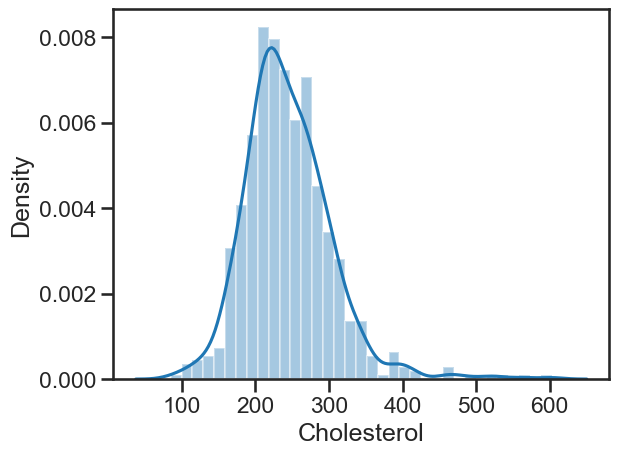

In [164]:
sns.distplot(data.Cholesterol)
plt.show()

Lets use the `LabelEncoder` object to turn categorical features into numerical.

In [165]:
for column in columns: 
    labels = list(data[column].unique())

    # Initialise LabelEncoder object
    le = LabelEncoder()
    le.fit(labels)
    data[column] = le.transform(data[column]) # replace column data with the labeled values
    print(str(column),'values ->' , labels) # print the encoding to know the transformation of the label encoder

Sex values -> ['M', 'F']
ChestPainType values -> ['ATA', 'NAP', 'ASY', 'TA']
FastingBS values -> [0, 1]
RestingECG values -> ['Normal', 'ST', 'LVH']
ExerciseAngina values -> ['N', 'Y']
ST_Slope values -> ['Up', 'Flat', 'Down']
HeartDisease values -> [0, 1]


In [166]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Split the dataset into test and train data using `train_test_split`

In [167]:
def Data_split(data, scaling):
    X = data.iloc[:, :-1] # get the feature variables
    
    # If scaling is requested scale the X data using MinMaxScaler
    if scaling == True:
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)

    y = data.iloc[:, -1:] # get the target variable
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) # split the dataset using a 20% test size
    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)

    return X_train, X_test, y_train, y_test, X, y

In [168]:
# Non-scaled train and test sets
X_train, X_test, y_train, y_test, X, y = Data_split(data=data, scaling=False)

Train set: (596, 11) (596, 1)
Test set: (150, 11) (150, 1)


In [169]:
# Scaled train and test sets
X_train_mm, X_test_mm, y_train, y_test, X_mm, y = Data_split(data=data, scaling=True)

Train set: (596, 11) (596, 1)
Test set: (150, 11) (150, 1)


# *Modelling*

Lets construct a function that evaluates the classifiers performance

In [170]:
def evaluate(yt, yp, eval_type):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

Lets construct a function that visualizes the metrics of the classifiers

In [171]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(results)
    x = np.arange(5)
    # define a color canvas
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    # this array will be used for plotting the different models next to each other.
    n = df.shape[0] # number of models to be plotted
    width = 1/(n+0.4)
    x_ticks = np.arange(-((n-1)//2), -((n-1)//2) + (n), 1)*width
    plt.figure(figsize=(18, 10), dpi=80)
    for i in range(n):
        plt.bar(x+x_ticks[i], df.iloc[i,1:].values, width, color=colors[i])
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'F1-score'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(df.type)
    plt.show()

Initialize a list to compare the performance of different models

In [172]:
results = []

## Logistic Regression

Lets fits our logistic regression models using `LogisticRegression`. 2 models will be tested, one with the l1 regulasization applied (LASSO) and another with the l2 (Ridge) regularization applied.

In [173]:
results_log = [] # initialise list to be used for comparison of the logistic regression models

In [174]:
# Logistic regression model with LASSO regularization error applied
log_l1 = LogisticRegression(random_state=0, penalty='l1', multi_class='multinomial', solver='saga', max_iter=1000)
log_l1.fit(X_train, y_train)
y_pred = log_l1.predict(X_test)

result = evaluate(y_test, y_pred, "Logistic, L1")
print(result)
results_log.append(result)

{'type': 'Logistic, L1', 'accuracy': 0.86, 'recall': 0.8428571428571429, 'auc': 0.8589285714285715, 'precision': 0.855072463768116, 'fscore': 0.8433205057724025}


In [175]:
# Logistic regression model with Ridge regularization error applied
log_l2 = LogisticRegression(random_state=0, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_l2.fit(X_train, y_train)
y_pred = log_l2.predict(X_test)

result = evaluate(y_test, y_pred, "Logistic, L2")
print(result)
results_log.append(result)
results.append(result)

{'type': 'Logistic, L2', 'accuracy': 0.8933333333333333, 'recall': 0.9428571428571428, 'auc': 0.8964285714285715, 'precision': 0.8461538461538461, 'fscore': 0.9387308533916849}


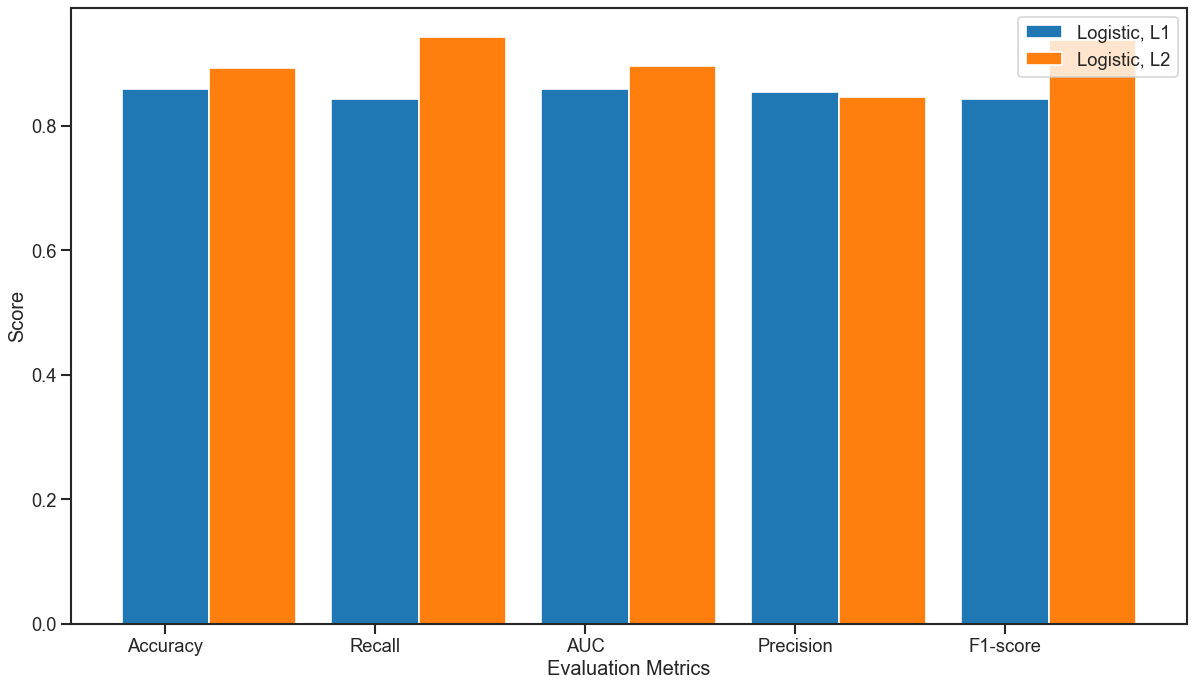

In [176]:
visualize_eval_metrics(results_log)

As we can see, the model that works best, is the Logistic Regression Classifier with the ridge regularization applied. Since the model is relatively simple, the advantageous feature selection of LASSO, sets too many coefficients to zero, further simplifying the model which ultimately worsens the performance of the logistic regression classifier. 

## K-Nearest Neighbors

We will now build our KNN model. Before fitting our final model using `KNeighborsClassifier`, we must determine the right value for K. To do so, we will examine results for values of K from 1 to 30 using the Error Rate as our evaluation metric. We we plot the error rate of each k in a plot called the `Elbow Curve`. Consequently, the k with the lowest error rate will be the one used to fit the model.

In [177]:
def KNN_iteration(X_train, y_train, maximum_k):
    global max_k 
    max_k = maximum_k
    error_rates = list() # 1-accuracy

    for k in range(1, max_k):
        
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance') # define the object 
        knn = knn.fit(X_train, y_train) # fit the model
        
        y_pred = knn.predict(X_test) 
        error = 1-round(accuracy_score(y_test, y_pred), 4) # calculate the error rate
        error_rates.append((k, error))
        
    error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate']) # add all values in a dataframe
    return error_results


Plot the `Elbow Curve`.

In [178]:
def plot_elbow(error_results, max_k):
    sns.set_context('talk')
    sns.set_style('ticks')

    plt.figure(dpi=300)
    ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
    ax.set(xlabel='K', ylabel='Error Rate')
    ax.set_xticks(range(1, max_k, 2))
    plt.title('KNN Elbow Curve')
    plt.savefig('knn_elbow.png')

<Figure size 1920x1440 with 0 Axes>

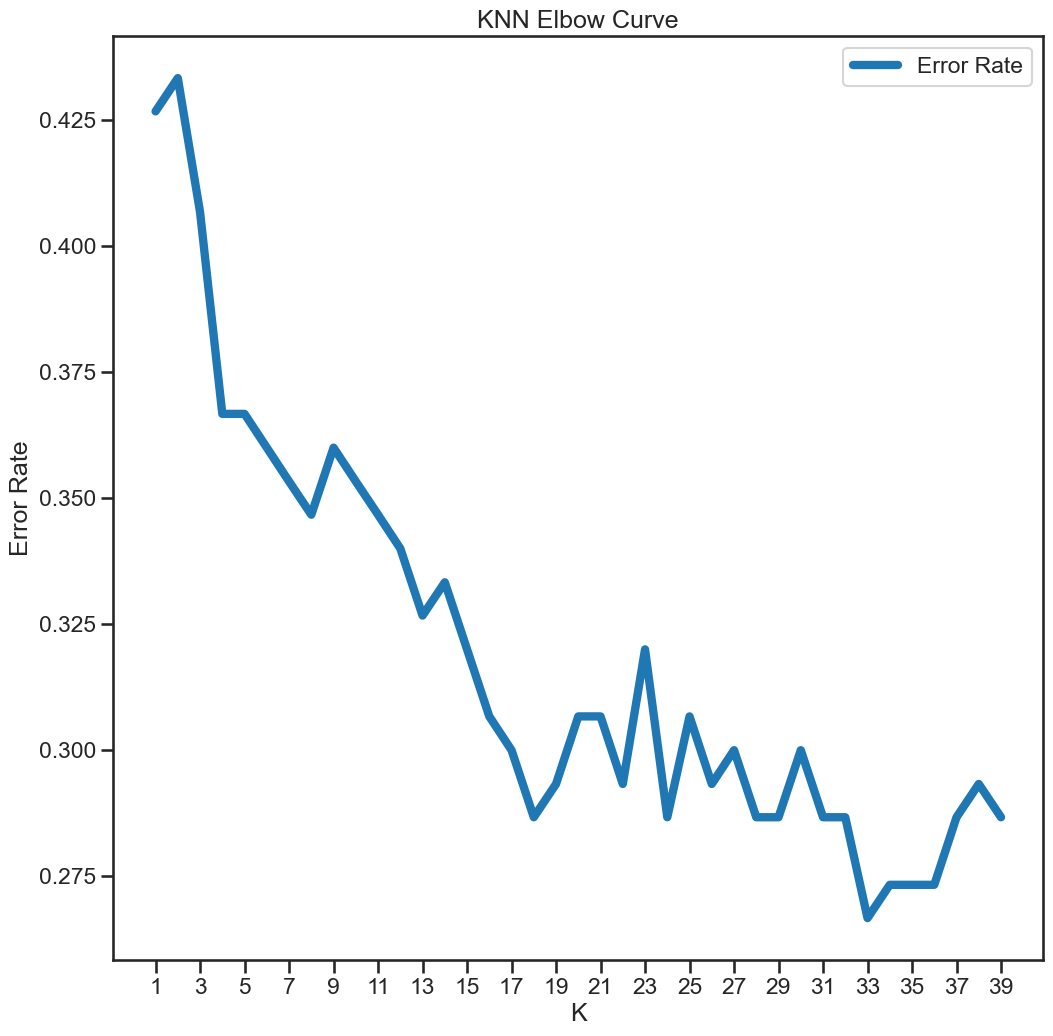

In [179]:
error_results = KNN_iteration(X_train, y_train, 40)
plot_elbow(error_results, max_k)

Lets fit two models using k=18 and k=33 as indicated by the `Elbow Curve`.

In [180]:
results_knn = [] # initialise list to be used for comparison of the knn models

In [181]:
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

result = evaluate(y_test, y_pred, 'KNN (k=18)')
print(result)
results_knn.append(result)

{'type': 'KNN (k=18)', 'accuracy': 0.7133333333333334, 'recall': 0.6714285714285714, 'auc': 0.7107142857142857, 'precision': 0.7014925373134329, 'fscore': 0.6725371491469454}


In [182]:
knn = KNeighborsClassifier(n_neighbors=33, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

result = evaluate(y_test, y_pred, 'KNN (k=33)')
print(result)
results_knn.append(result)
results.append(result) # discussion follows on why this algorithm is the best out of the KNN

{'type': 'KNN (k=33)', 'accuracy': 0.7333333333333333, 'recall': 0.7, 'auc': 0.73125, 'precision': 0.7205882352941176, 'fscore': 0.7007700770077007}


The metrics indicate that the KNN algorithm does not perform very well. This could be because the features are not equally scaled. Feature scaling is very important when applying KNN as the algorithms measures distances between points. Therefore, the feature with the smallest scale will influence the algorithm the most since most of the points will be at close proximity to one another. To try to improve the accuracy of the model, we can use a scaler such as the `MinMaxScaler` to make sure that all the values will carry the same weight. Another scaler that can be used is the `StandardScaler`.

Notice that while scaling can be beneficial for many machine learning algorithms, KNN is one of the algorithms that might not always benefit significantly from feature scaling, and in some cases, it might even degrade performance. By changing the scales, important features with small scales will not influence the model so much anymore. Also outliers that would not affect the algorithm will now compress the values, especially if `MinMaxScaler` is applied. 

<Figure size 1920x1440 with 0 Axes>

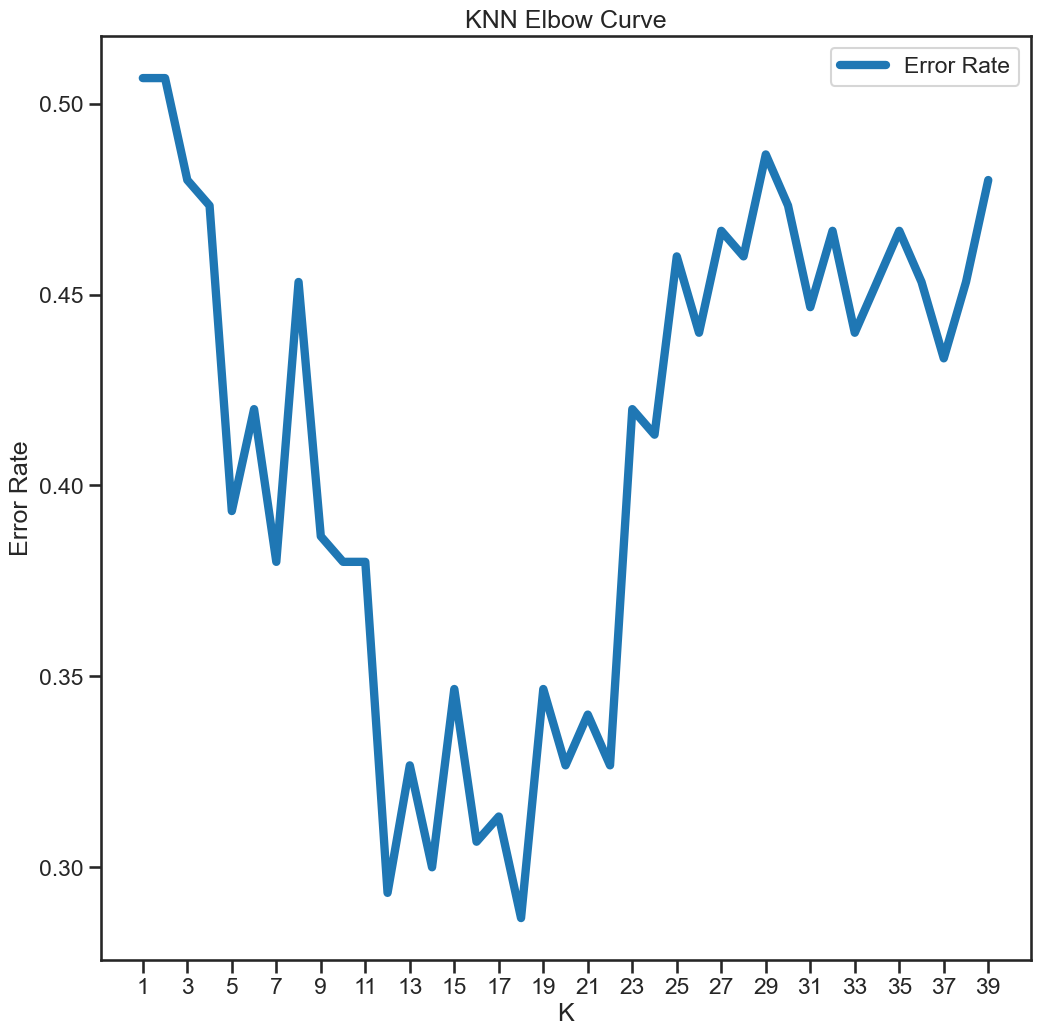

In [183]:
error_results = KNN_iteration(X_train_mm, y_train, 40)
plot_elbow(error_results, max_k)

We can see the effect of scaling on the Error Curve. Lets fit two models using k=12 and k=18 as indicated by the `Elbow Curve`. Once, again, scaling does not guarantee better results in this case.

In [184]:
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn.fit(X_train_mm, y_train)
y_pred = knn.predict(X_test)

result = evaluate(y_test, y_pred, 'KNN (k=12), MM')
print(result)
results_knn.append(result)

{'type': 'KNN (k=12), MM', 'accuracy': 0.7066666666666667, 'recall': 0.5571428571428572, 'auc': 0.6973214285714286, 'precision': 0.75, 'fscore': 0.562708102108768}


In [185]:
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')
knn.fit(X_train_mm, y_train)
y_pred = knn.predict(X_test)

result = evaluate(y_test, y_pred, 'KNN (k=18), MM')
print(result)
results_knn.append(result)

{'type': 'KNN (k=18), MM', 'accuracy': 0.7133333333333334, 'recall': 0.7, 'auc': 0.7124999999999999, 'precision': 0.6901408450704225, 'fscore': 0.6996155958264689}


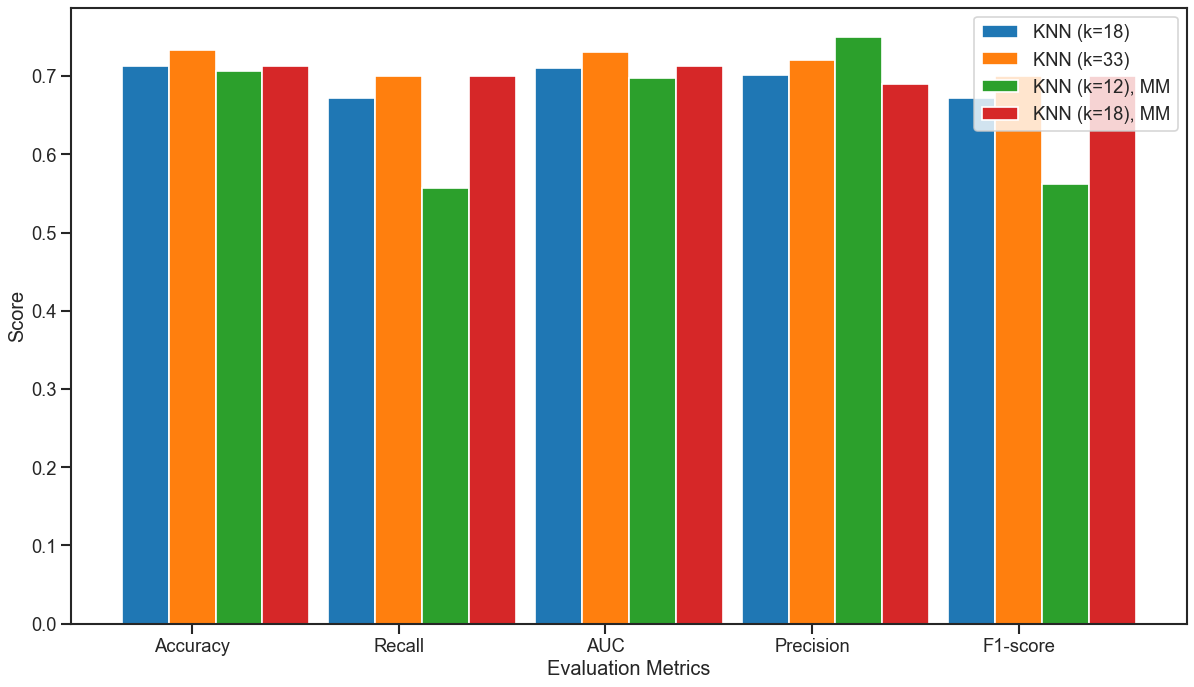

In [186]:
visualize_eval_metrics(results_knn)

As expected, scaling did not solve our problem. The best KNN model remains the one with k=33 and non-scaled features. Nevertheless, we can see that the KNN model with k=18 that uses scaled features performs just slightly worse. Since the second algorithm only calculates distances from 18 nearest neighbors (instead of 33), it is significantly more computationally efficient. This is not at interest here (and also KNN doesn not perform well on this dataset) but if efficiency was an issue I would have chosen the KNN (k=18), MM classifier.

## Support Vector Machine

Lets now try to fit the data using the Support Vector Machine classification algorithm

In [187]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)
y_pred = SVM_model.predict(X_test)

SVM model used is not very accurate. This is probably because it overfits on the training data. Lets try to tune the hyperparameters using `GridSearchCV` to improve the accuracy of the model.

In [188]:
# define the parameters
params_grid = {
    'C': [1, 3, 10, 30, 100, 300],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [189]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = SVM_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [190]:
hyperparameters = SVM_model.get_params()

# Print the hyperparameters
print("SVC Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

SVC Hyperparameters:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


In [191]:
best_params

{'C': 300, 'kernel': 'poly'}

We can see that from the grid search that a high C value of 300 and a polynomial kernel are the best among the hyperparameters searched. The high C value indicates a low regularization related penalty should be added on the SVM cost function and also that the model we are fitting is already not so complex for much regularization to be needed. With the higher C and the use of Cross-Validation, overfitting is significantly reduced, as indicated by the increase in the measured metrics.

In [192]:
SVM_model = SVC(C=best_params['C'], kernel=best_params['kernel'])
SVM_model.fit(X_train,y_train)
y_pred = SVM_model.predict(X_test)

result = evaluate(y_test, y_pred, "SVM")
print(result)
results.append(result)

{'type': 'SVM', 'accuracy': 0.8733333333333333, 'recall': 0.8857142857142857, 'auc': 0.874107142857143, 'precision': 0.8493150684931506, 'fscore': 0.8842567196928139}


## Decision Tree

In [193]:
results_tree = [] # initialise list to be used for comparison of the decision tree models

Lets define the hyperparameters we will optimise using `GridSearchCV`. 

In [194]:
params_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 10, 15, 20],
    'min_samples_leaf' : [1, 2, 5]
}

In [195]:
de_tree = DecisionTreeClassifier() # define the estimator

GR = GridSearchCV(estimator=de_tree,
                           param_grid=params_grid,
                           scoring='f1',
                           cv=5, verbose=1
                           )
GR.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5]},
             scoring='f1', verbose=1)

Our best hyperparameters

In [196]:
GR.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [197]:
de_tree_5 = DecisionTreeClassifier(criterion=GR.best_params_['criterion'], max_depth=GR.best_params_['max_depth'], min_samples_leaf=GR.best_params_['min_samples_leaf'], random_state=0)
de_tree_5.fit(X_train, y_train.values.ravel())
y_pred = de_tree_5.predict(X_test)

result = evaluate(y_test, y_pred, "Tree (depth=5)")
print(result)
results_tree.append(result)

{'type': 'Tree (depth=5)', 'accuracy': 0.8933333333333333, 'recall': 0.9428571428571428, 'auc': 0.8964285714285715, 'precision': 0.8461538461538461, 'fscore': 0.9387308533916849}


Lets try another model with max_depth=3

In [198]:
de_tree_3 = DecisionTreeClassifier(criterion=GR.best_params_['criterion'], max_depth=3, min_samples_leaf=GR.best_params_['min_samples_leaf'], random_state=0)
de_tree_3.fit(X_train, y_train.values.ravel())
y_pred = de_tree_3.predict(X_test)

result = evaluate(y_test, y_pred, "Tree (depth=3)")
print(result)
results_tree.append(result)
results.append(result)

{'type': 'Tree (depth=3)', 'accuracy': 0.8933333333333333, 'recall': 0.9714285714285714, 'auc': 0.8982142857142856, 'precision': 0.8292682926829268, 'fscore': 0.9650655021834061}


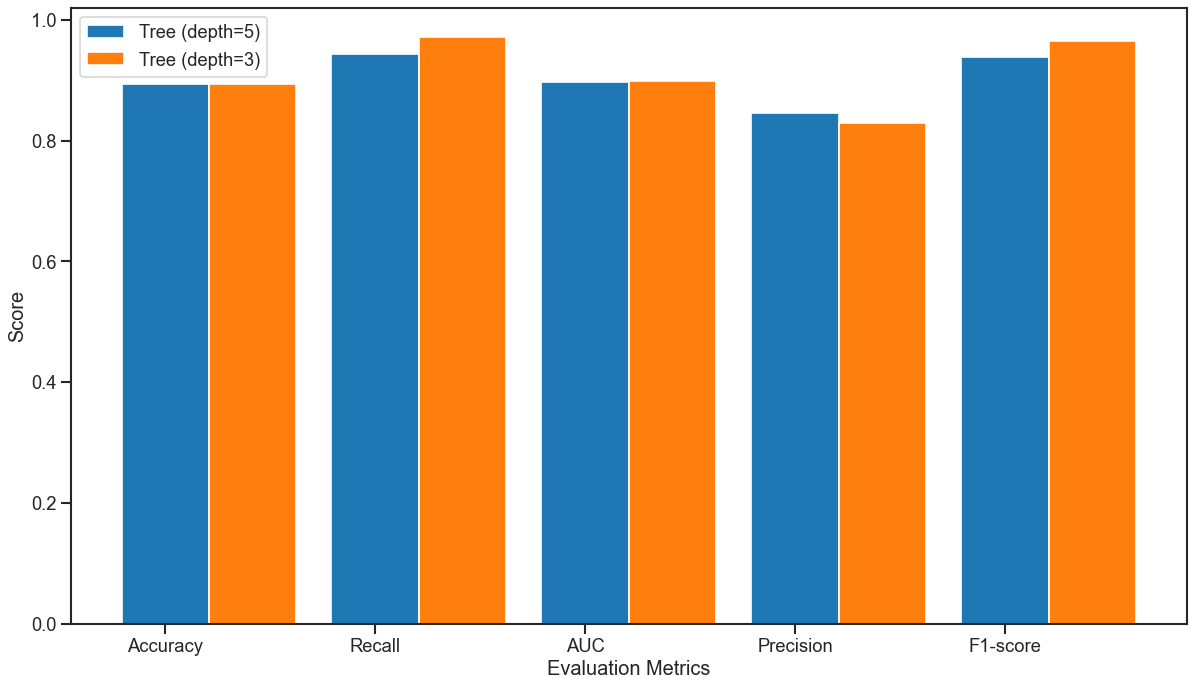

In [199]:
visualize_eval_metrics(results_tree)

As we can see the second model outperforms the first model whose hyperparameters were determined from `GridSearchCV()`. This might seem a bit odd at first but the best parameters found may not be optimal for the test data. This is because Grid Search Cross-Validation will determine the best parameters based on the F1-score calculated from the train data. Therefore, it is very likely (especially with decision Trees) that the model will overfit on the train dataset and hence perform significantly worse on the test set. We can see this if we compare the training accuracy:  

In [200]:
result = evaluate(y_train, de_tree_5.predict(X_train), "Tree (depth=5), train")
print(result)
result = evaluate(y_train, de_tree_3.predict(X_train), "tree (depth=3), train")
print(result)

{'type': 'Tree (depth=5), train', 'accuracy': 0.9060402684563759, 'recall': 0.8951048951048951, 'auc': 0.9056169636814797, 'precision': 0.9078014184397163, 'fscore': 0.8955866523143163}
{'type': 'tree (depth=3), train', 'accuracy': 0.8573825503355704, 'recall': 0.8811188811188811, 'auc': 0.8583013760433116, 'precision': 0.8316831683168316, 'fscore': 0.8791090835905004}


As we can see, the first Tree model with max_depth=5 outperforms the second model with max_depth=3 on every metric but unfortunately this is a result of overfitting!

One of the good things about Decision Trees is their ease of interpretability. Unlike other classifiers like SVM or KNN algorithms, decision-making of the algorithm can be easily shown and understood. There are many options for plotting the decision tree model. The most basic option is to use the `tree.plot_tree()` method provided by `sklearn` to quickly plot any decision tree model. Another more advanced option is to use the `dtreeviz()` from `dtreeviz.trees`. With this method, we can see the distibutions of the features at each leaf and gain a better insight at the algorithm. For the analysis here we will use sklearn.

In [201]:
# sklearn simple method
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

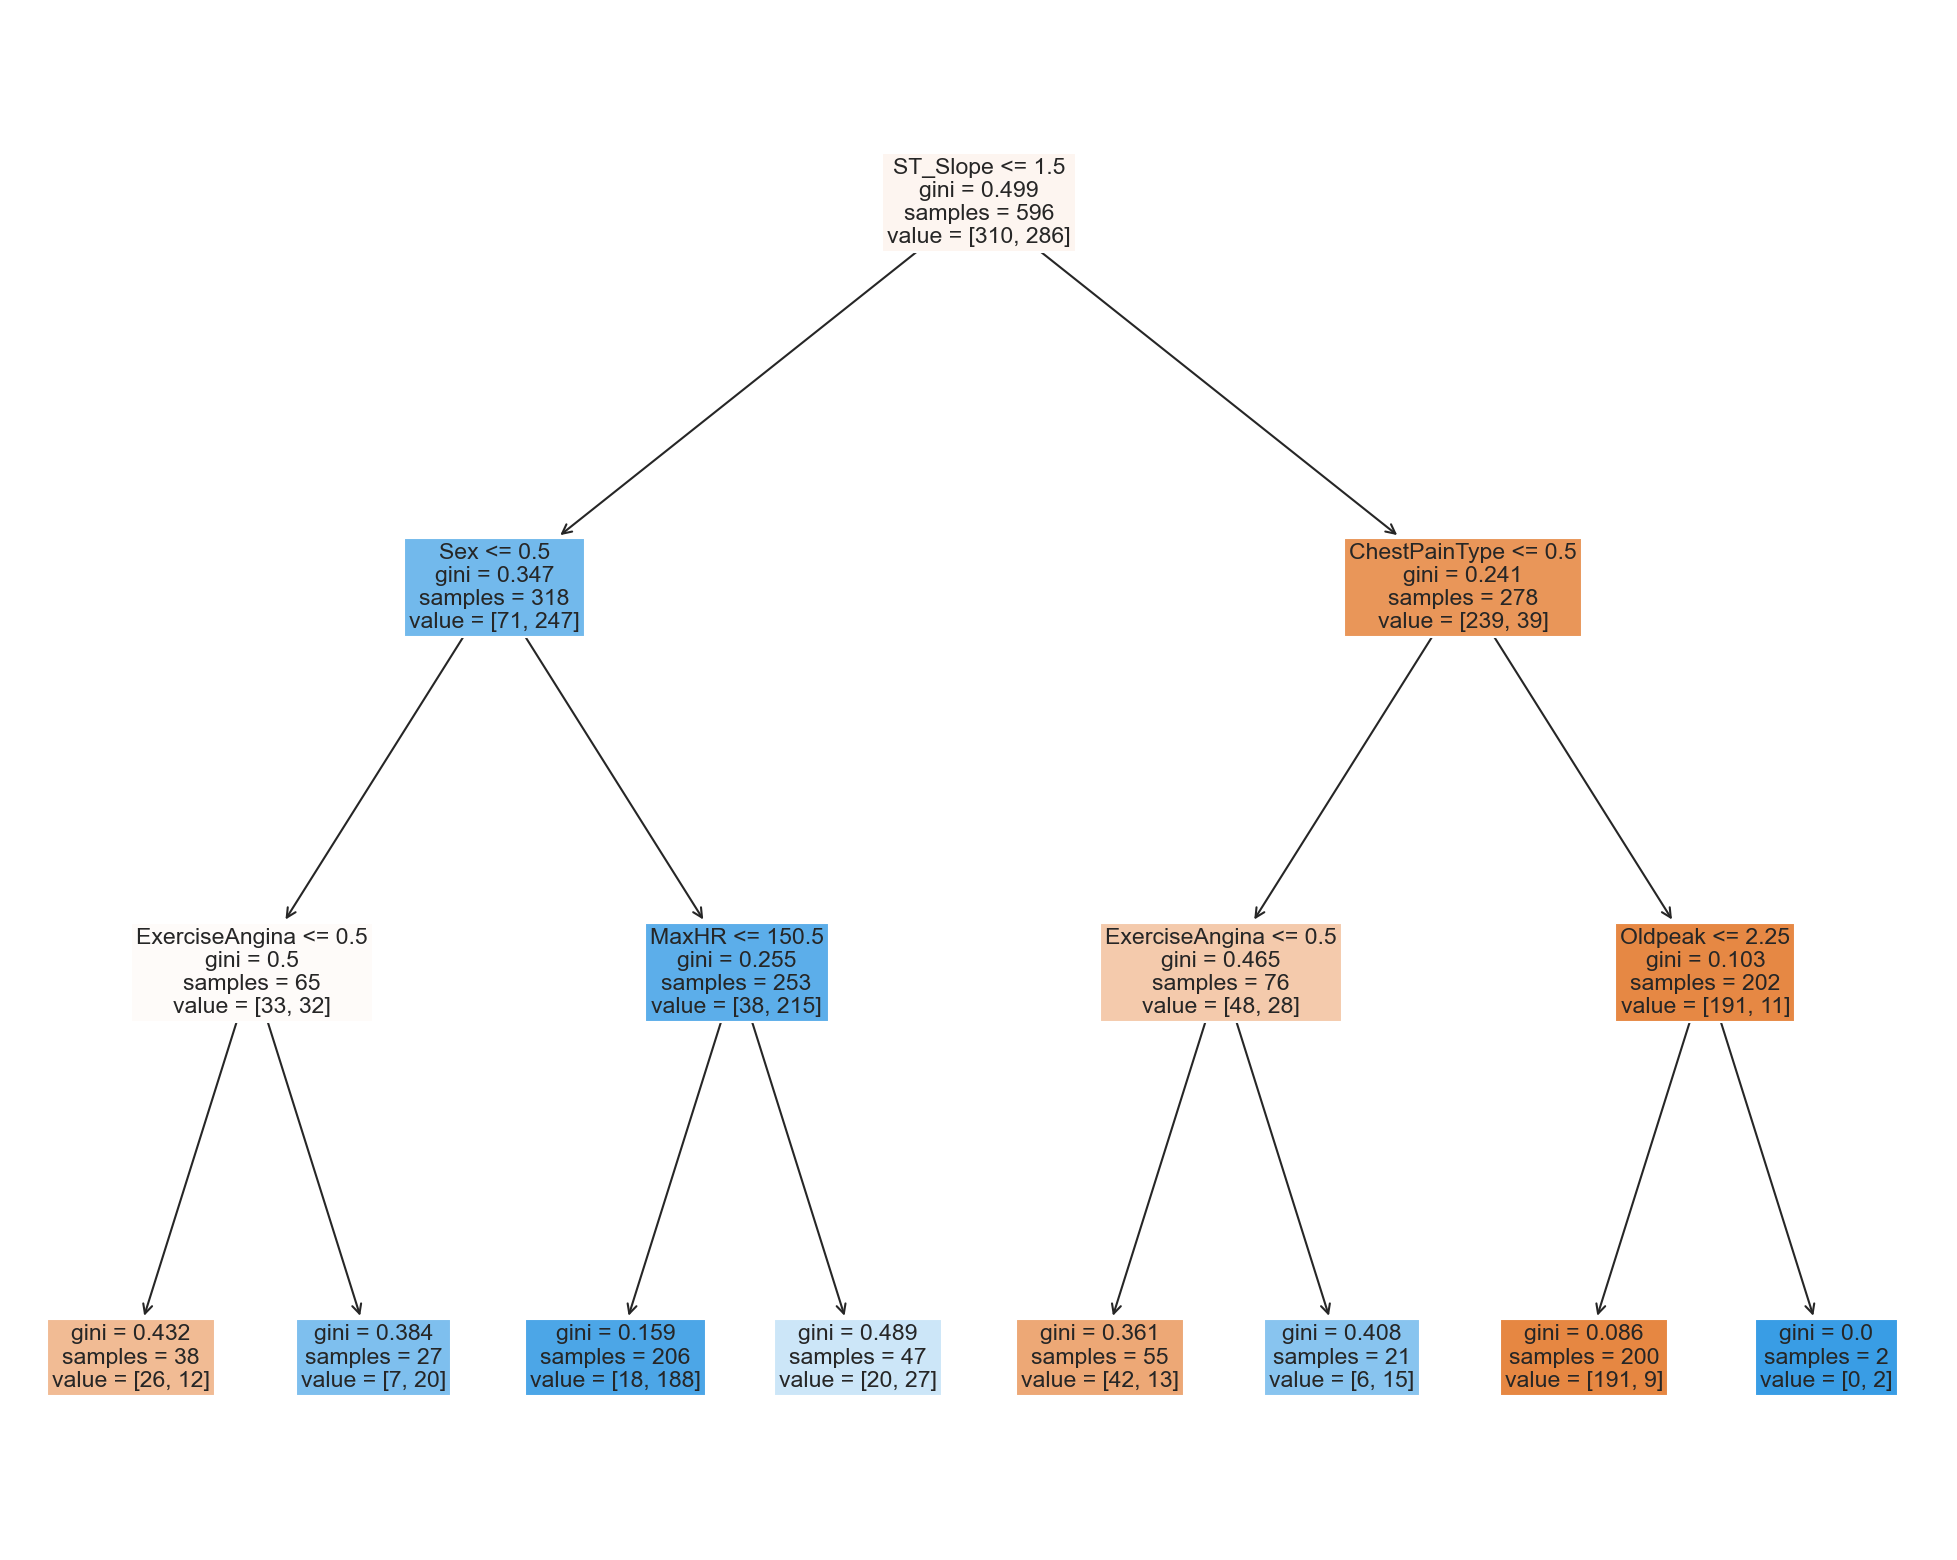

In [202]:
plot_decision_tree(de_tree_3, X.columns.values)

Lets print the logic of the decision tree model:

In [203]:
text = tree.export_text(de_tree_3)
print(text)

|--- feature_10 <= 1.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_7 <= 150.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  150.50
|   |   |   |--- class: 1
|--- feature_10 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_9 <= 2.25
|   |   |   |--- class: 0
|   |   |--- feature_9 >  2.25
|   |   |   |--- class: 1



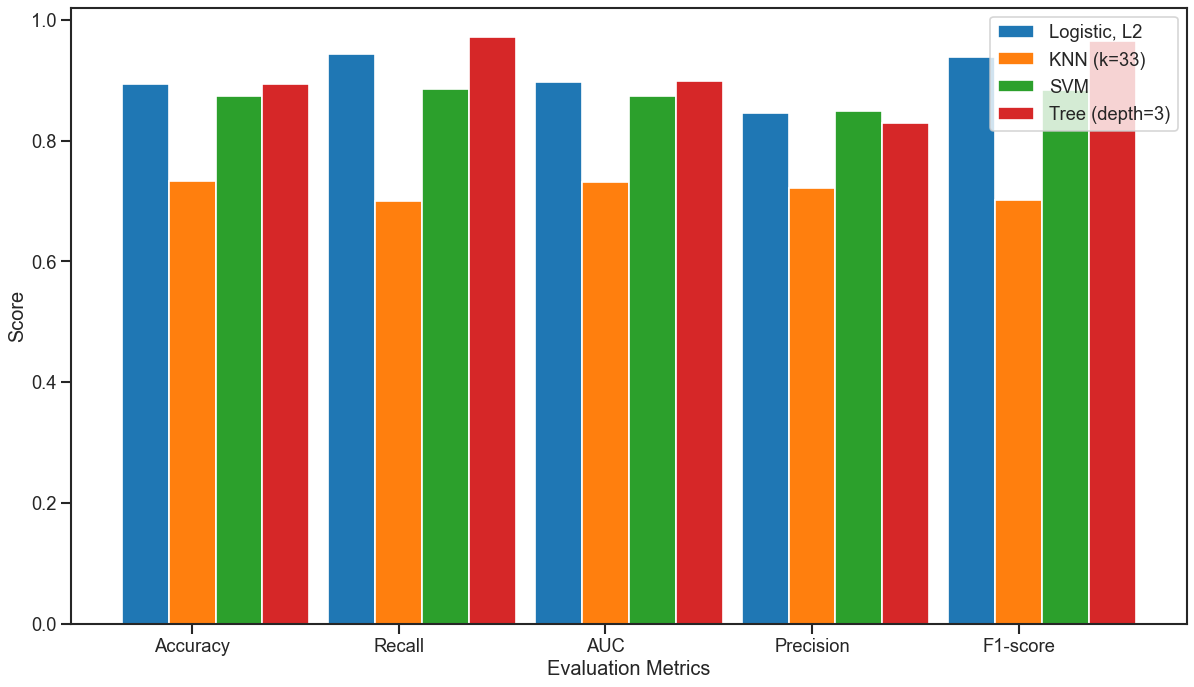

In [204]:
visualize_eval_metrics(results)

# *Ensemble Methods*

In [205]:
en_results = []

## Bagging

In [206]:
en_results_bag = []

Bagging (Bootstrap Aggregating) is a an ensmble meta-algorithm designed to reduce overfitting and model variance. This is achieved by breaking the original dataset, $D$, into smaller datasets, $D$<sub>i</sub>, by sampling from $D$ with replacement. Sampling with replacement guarantees the independence of each bootstrap, as it does not rely on the selection of prior samples during the sampling process. Subsequently, $m$ models are trained using the generated m bootstrap samples, and their outputs are aggregated through averaging (for regression) or voting (for classification).

Define the parameter grid

In [207]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'estimator__max_depth' : [2*n+1 for n in range(10)],
     'estimator__criterion' : ['entropy', 'gini']
     }

Lets build our `BaggingClassifier` object.


In [208]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, bootstrap=True) # by default the estimator is set to DecisionTreeClassifier()

In [209]:
# perform grid search
GR = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='f1', cv=3)
GR.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'estimator__criterion': ['entropy', 'gini'],
                         'estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                  19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='f1')

In [210]:
GR.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': 9,
 'n_estimators': 37}

Lets fit our Bag model

In [211]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion=GR.best_params_['estimator__criterion'], max_depth=GR.best_params_['estimator__max_depth']),n_estimators=GR.best_params_['n_estimators'],random_state=0,bootstrap=True)
Bag.fit(X_train, y_train)
y_pred = Bag.predict(X_test)

result = evaluate(y_test, y_pred, 'Bag')
print(result)
en_results_bag.append(result)
en_results.append(result) # this turns out to be the best performing bagging model

{'type': 'Bag', 'accuracy': 0.9, 'recall': 0.9285714285714286, 'auc': 0.9017857142857143, 'precision': 0.8666666666666667, 'fscore': 0.9260273972602742}


## Random Forest

`RandomForestClassifier` is a specific type of bagging algorithm that builds multiple decision trees and aggregates the results to train the classifier. The difference comes form the fact that random forest specifically builds decision trees by sampling a random subset of features from the original dataset. By considering only a random subset of features at each split point, further randomness is introduced that further decorrelates the trees and often leads to more robust and accurate models. For classification, trees will use only $\sqrt{features}$ and $\frac{features}{3}$ for regression.


Prior to constructing the model, it is essential to determine the optimal number of decision trees to use. This step involves assessing the appropriate quantity of trees that will contribute to the model's effectiveness. Adjusting the number of trees may be necessary based on factors such as dataset size, complexity, and the desired balance between model performance and computational efficiency.

In [212]:
# define the model; number of trees will be determined lated from the out of bag error metric (OOB)
RF = RandomForestClassifier(oob_score=True, random_state=1, warm_start=True, n_jobs=-1)

oob_list = list() # create this list to keep track of the OOB error

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    # Define the number of trees of the model
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_ # calculate the error  
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

[Text(0, 0.5, 'out-of-bag error')]

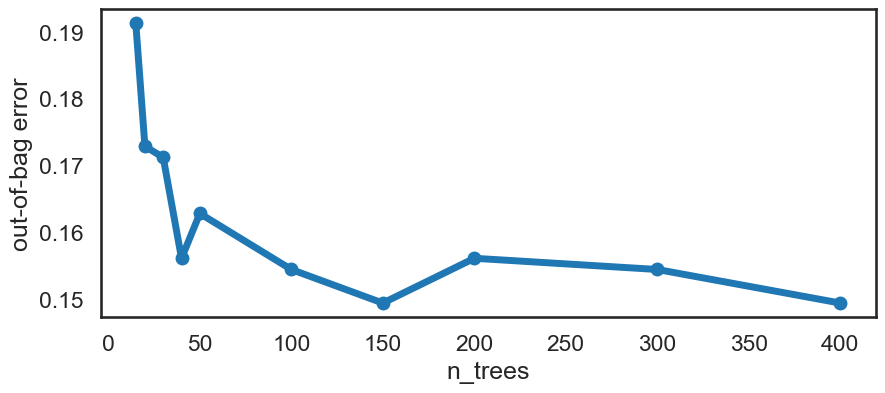

In [213]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10, 4), linewidth=5)
ax.set(ylabel='out-of-bag error')

Lets tune the other hyperparemeters using `GridSearchCV`. Notice that the figure above is very sensitive upon the `random_state` value. This value determines the way splits are done for the training and testing datasets. By using Cross-Validation, we reduce the variance of splitting the dataset. 

In [214]:
param_grid = {
    'n_estimators': [100, 150, 200, 150, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [215]:
GR = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
GR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 150, 300, 400]},
             scoring='accuracy')

In [216]:
GR.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

Lets now build the model

In [217]:
RF = RandomForestClassifier(oob_score=True, random_state=0, warm_start=True, n_jobs=-1, max_depth=GR.best_params_['max_depth'], n_estimators=GR.best_params_['n_estimators'], min_samples_leaf=GR.best_params_['min_samples_leaf'], min_samples_split=GR.best_params_['min_samples_split'])
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

result = evaluate(y_test, y_pred, 'RF')
print(result)
en_results_bag.append(result)

{'type': 'RF', 'accuracy': 0.9133333333333333, 'recall': 0.9428571428571428, 'auc': 0.9151785714285714, 'precision': 0.88, 'fscore': 0.9402739726027397}


## Extra Trees

Both ExtraTreesClassifier and RandomForestClassifier are ensemble methods based on decision trees. The difference is that ExtraTrees introduces additional randomness by making random split decisions of the features without an exhaustive search. This extra randomness can lead to more diverse trees and, in some cases, better generalization performance. However, the impact can vary depending on the dataset and problem at hand, so it's often a good idea to experiment with both methods to determine which works best for a specific task.

In [218]:
# define the model; number of trees will be determined lated from the out of bag error metric (OOB)
ET = ExtraTreesClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1, bootstrap=True)

oob_list = list() # create this list to keep track of the OOB error

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    # Define the number of trees of the model
    ET.set_params(n_estimators=n_trees)
    ET.fit(X_train, y_train)
    oob_error = 1 - ET.oob_score_ # calculate the error  
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

[Text(0, 0.5, 'out-of-bag error')]

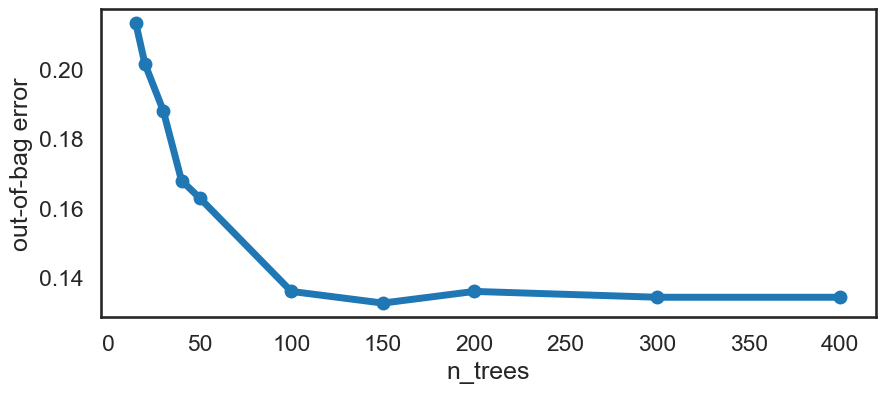

In [219]:
sns.set_context('talk')
sns.set_style('white')

ax = et_oob_df.plot(legend=False, marker='o', figsize=(10, 4), linewidth=5)
ax.set(ylabel='out-of-bag error')

In [220]:
ET = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
ET.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 150, 300, 400]},
             scoring='accuracy')

In [221]:
GR.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [222]:
ET = ExtraTreesClassifier(oob_score=True, random_state=0, max_depth=GR.best_params_['max_depth'], warm_start=True, n_jobs=-1, bootstrap=True, n_estimators=GR.best_params_['n_estimators='], min_samples_leaf=GR.best_params_['min_samples_leaf='], min_samples_split=GR.best_params_['min_samples_split'])
ET.fit(X_train, y_train)
y_pred = ET.predict(X_test)

result = evaluate(y_test, y_pred, 'ET')
print(result)
en_results_bag.append(result)

KeyError: 'n_estimators='

Before evaluating all the bagging models lets compare RandomForest and ExtraTrees performance.

[Text(0, 0.5, 'out-of-bag error')]

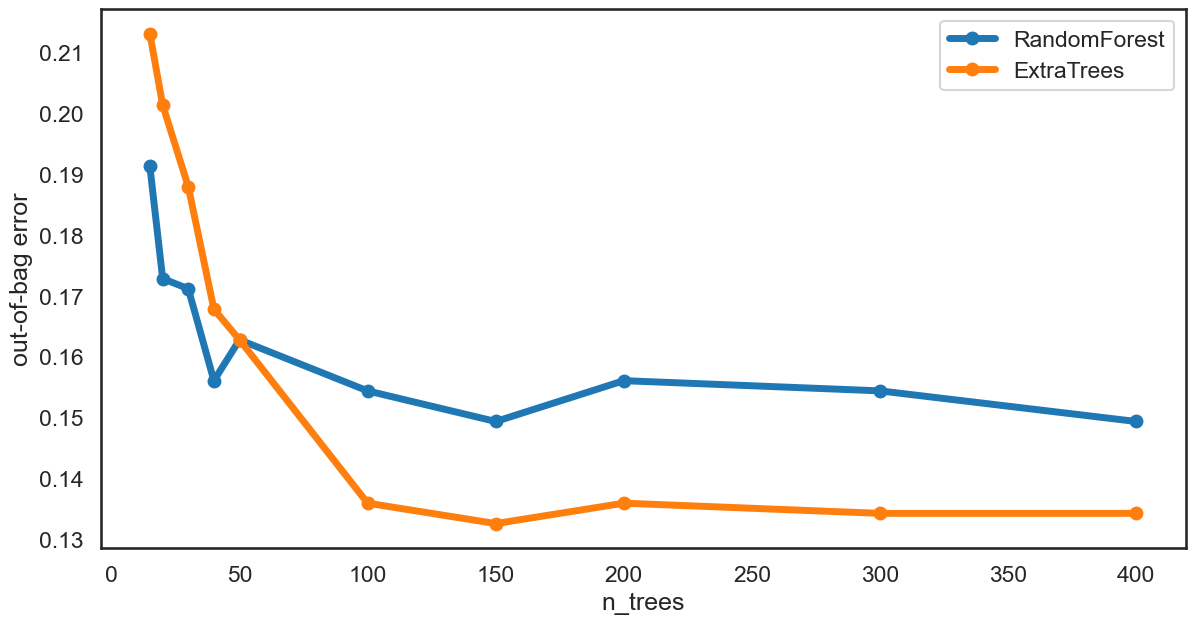

In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error')

Lets see how the 3 bagging algorithms compare.

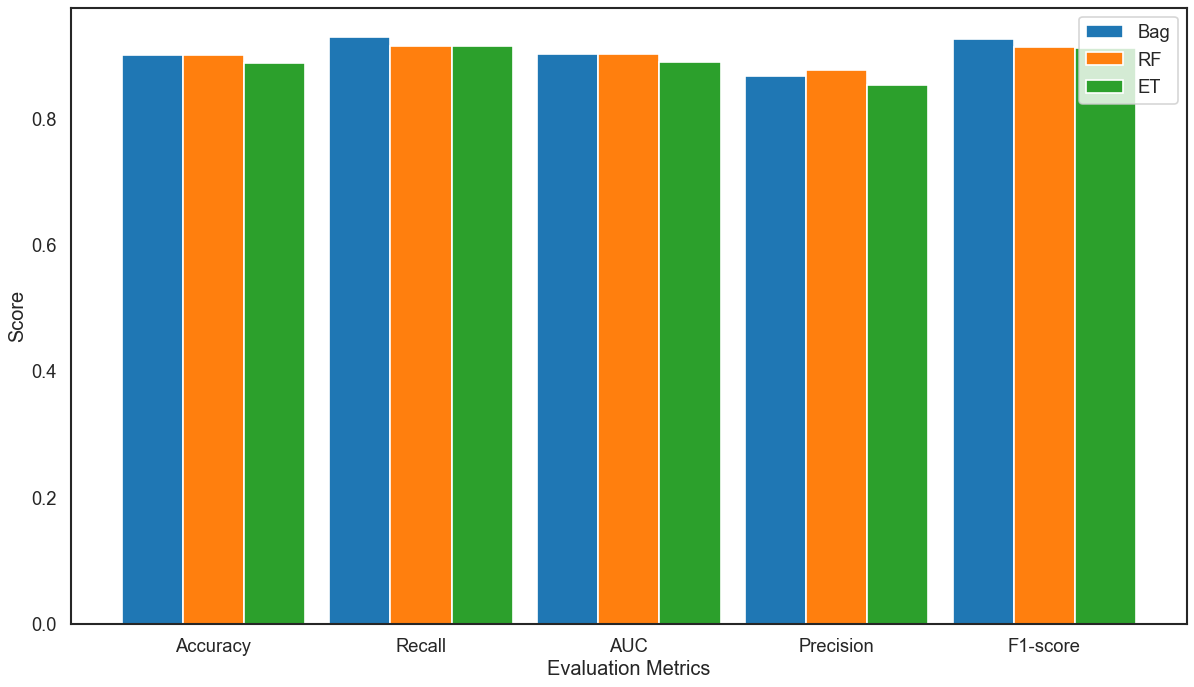

In [ ]:
visualize_eval_metrics(en_results_bag)

## Boosting

In [ ]:
en_results_boo = []

Boosting is another ensemble machine learning technique that, like bagging, combines the results of multiple weak learners to create a strong classification model. The key difference is that the boosting builds the weak models sequentially, with every learner trying to correct the errors of its predecessor. Successive classifiers are also weighted by a learning rate $λ≤1$  which helps to prevent overfitting. Moreover, boosting unlike bagging fits to the entire dataset. The additive way of improving the model forces it inevitably to overfit after a specific number of iterations; and is generally more prone to overfitting compared to bagging.

The main boosting algorithms used are: 
1. `AdaBoost` (Adaptive Boosting)
1. `GradientBoosting`
1. `XGBoost`

In this notebook, we will evaluate the performance of the first 2 boosting algorithms.

## AdaBoost

AdaBoost was the first boosting algorithm introduced by Yoav Freud and Robert Schapire in 1996.

The associated loss function of AdaBoost applied is: $$ f(x) = exp(-x) $$


In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200, 150, 300, 400],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'] # SAMME uses discrete AdaBoost; SAMME.R uses real boosting. Usually the latter performs better
}
# we can also search for a base estimator but we will use the default one (Decision Trees), as this is also the best performing one

In [ ]:
GR = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
GR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [100, 150, 200, 150, 300, 400]},
             scoring='accuracy')

In [ ]:
GR.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.4, 'n_estimators': 100}

In [ ]:
ABC = AdaBoostClassifier(n_estimators=GR.best_params_['n_estimators'], learning_rate=GR.best_params_['learning_rate'], algorithm=GR.best_params_['algorithm'], random_state=0)
ABC.fit(X_train, y_train)
y_pred = ABC.predict(X_test)

result = evaluate(y_test, y_pred, 'ABC')
print(result)
en_results_boo.append(result)

{'type': 'ABC', 'accuracy': 0.9133333333333333, 'recall': 0.9714285714285714, 'auc': 0.9169642857142859, 'precision': 0.8607594936708861, 'fscore': 0.9666484417714599}


## GradientBoosing

Gradient Boosting, offers advantages in terms of flexibility, handling non-smooth loss functions, and leveraging gradient information during training.

The associated loss function of AdaBoost applied is: $$ f(x) = log[1+exp(-x)] $$


In [ ]:
param_grid_GBC = {'learning_rate': [0.1, 0.01, 0.001, 0.0001],
             'n_estimators' : [2*n+1 for n in range(10)],
             'subsample' : [1.0, 0.5],
             'max_features' : [1, 2, 3, 4]
             }                

In [ ]:
best_params['max_depth']

5

In [ ]:
GR = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_GBC, scoring='accuracy', cv=3)
GR.fit(X_train,y_train)

In [ ]:
GR.best_params_

In [ ]:
ABC = GradientBoostingClassifier(n_estimators=GR.best_params_['n_estimators'], learning_rate=GR.best_params_['learning_rate'], subsample=GR.best_params_['subsample'], max_features=GR.best_params_['max_features'])
ABC.fit(X_train, y_train)
y_pred = ABC.predict(X_test)

result = evaluate(y_test, y_pred, 'ABC')
print(result)
en_results_boo.append(result)

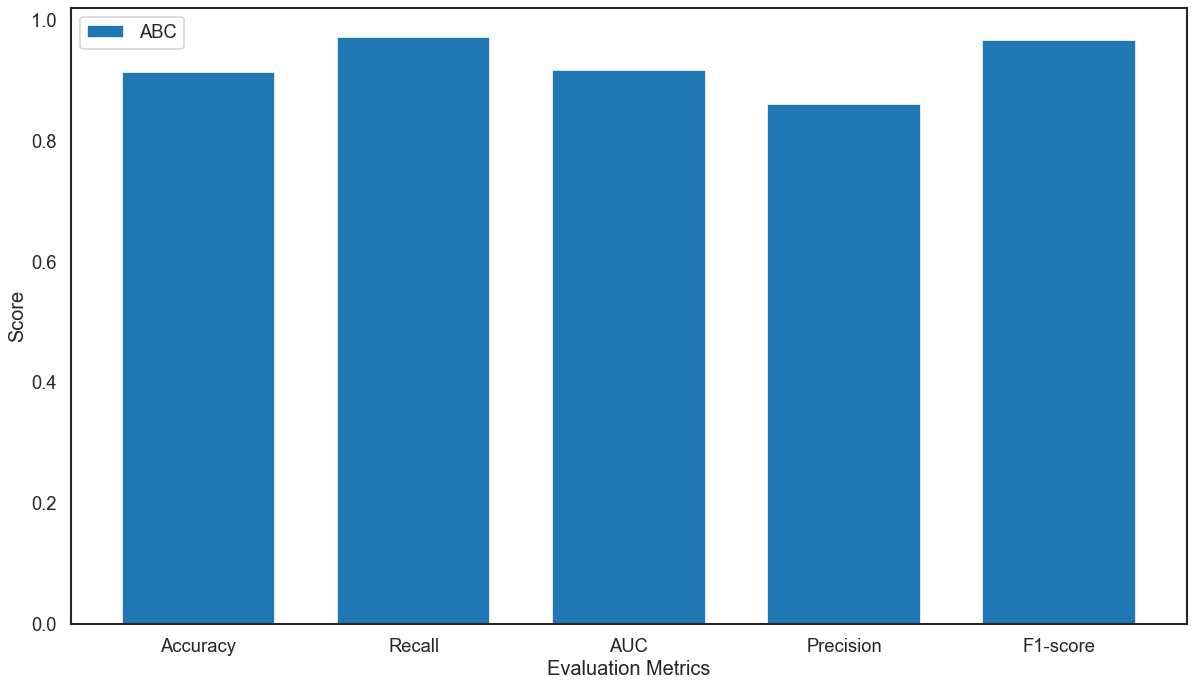

In [ ]:
visualize_eval_metrics(en_results_boo)

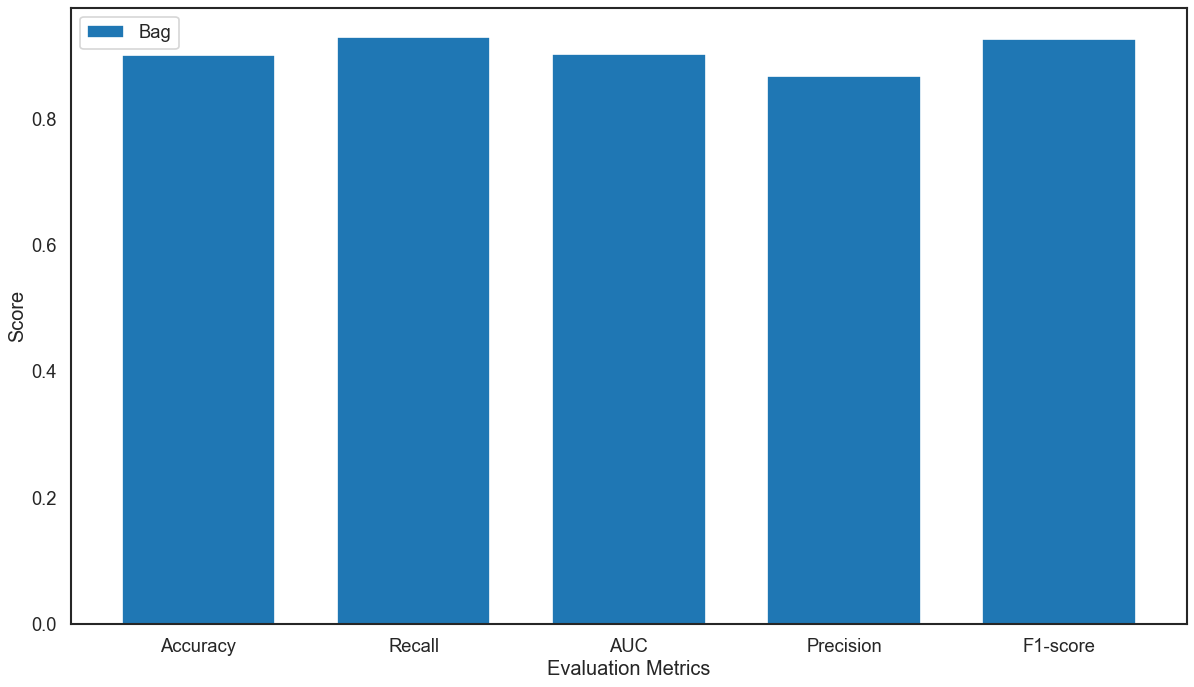

In [ ]:
visualize_eval_metrics(en_results)